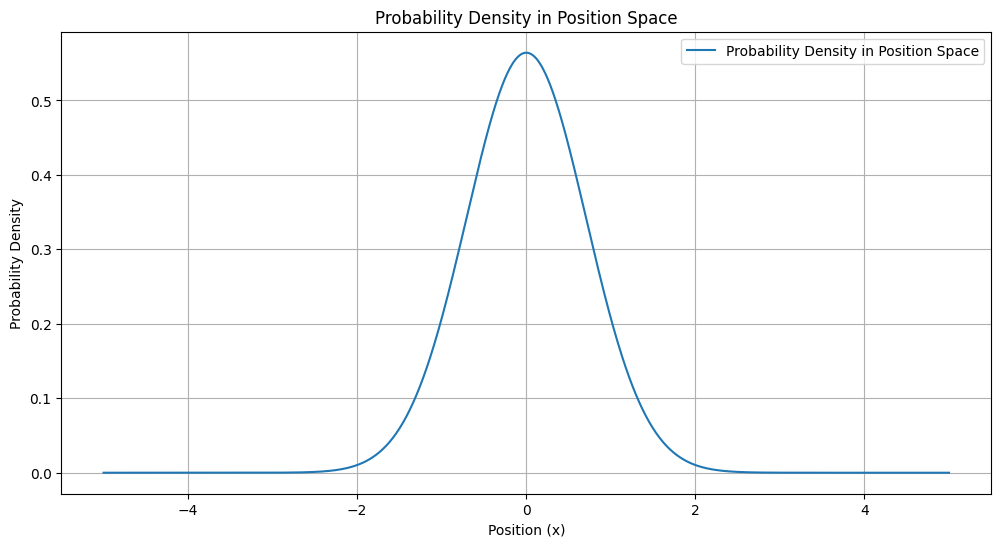

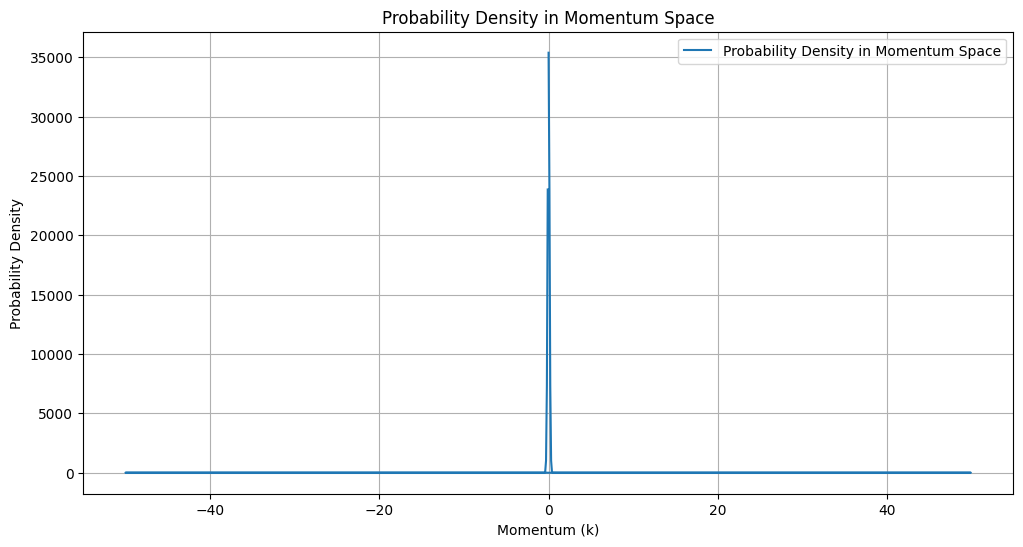

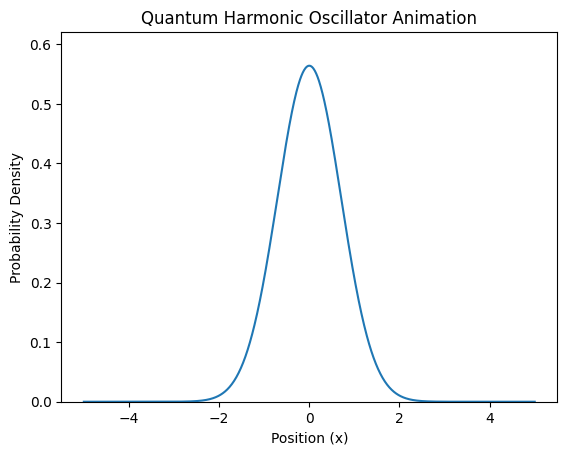

The Quantum Circuit:
0: ──RX(1.99)─┤  State


In [8]:
# This body of code illustrates the Fourier Transform and how it can simulate a quantum state
# Developed by: Dr. Michael P. Haydock - IBM Fellow Emeritus - Data & Optimization Sciences, Inc.
# Initial Coding: 2/11/2025

import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq
import matplotlib.animation as animation

# Parameters for the Gaussian wave packet
sigma = 1.0  # Width of the wave packet
xmax = 5.0
N = 1000
x = np.linspace(-xmax, xmax, N)
dx = x[1] - x[0]

# Define the Gaussian wave packet
psi_x = np.exp(-x**2 / (2 * sigma**2))
psi_x /= np.sqrt(np.sum(psi_x**2) * dx)  # Normalize the wave function
#print(psi_x)

# Compute the probability density in position space
probability_density_x = np.abs(psi_x)**2
#print(probability_density_x)

# Perform the Fourier Transform to get the wave function in momentum space
psi_k = fft(psi_x)
k = fftfreq(N, dx)

# Compute the probability density in momentum space
probability_density_k = np.abs(psi_k)**2
#print(probability_density_k)

# Plot the probability density in position space
plt.figure(figsize=(12, 6))
plt.plot(x, probability_density_x, label='Probability Density in Position Space')
plt.xlabel('Position (x)')
plt.ylabel('Probability Density')
plt.legend()
plt.title('Probability Density in Position Space')
plt.grid(True)
plt.show()

# Plot the probability density in momentum space
plt.figure(figsize=(12, 6))
plt.plot(k, probability_density_k, label='Probability Density in Momentum Space')
plt.xlabel('Momentum (k)')
plt.ylabel('Probability Density')
plt.legend()
plt.title('Probability Density in Momentum Space')
plt.grid(True)
plt.show()

# Define the Pennylane device
dev = qml.device("default.qubit", wires=1)

# Define the QNode for the quantum harmonic oscillator
@qml.qnode(dev)
def harmonic_oscillator(params):
    qml.RX(params[0], wires=0)
    return qml.state()

# Time evolution parameters
mass = 1.0
omega = 1.0
hbar = 1.0
dt = 0.01
T = 2.0
num_steps = int(T / dt)

# Define the potential energy for the harmonic oscillator
V = 0.5 * mass * omega**2 * x**2
#print(V)

# Initialize the wave function (Gaussian wave packet)
psi0 = np.exp(-0.5 * (x / 0.5)**2)
psi0 /= np.sqrt(np.sum(psi0**2) * dx)  # Normalize the wave function
#print(psi0)

# Time evolution of the wave function
params = np.array([0.0])
psi = np.zeros((num_steps, N), dtype=complex)
psi[0] = psi_x
#print(psi)

for n in range(1, num_steps):
    params[0] = n * dt
    U = harmonic_oscillator(params)
    psi[n] = psi[0] * U[0]  # Apply the quantum operation to the initial wave function

# Create a figure and axis for the animation
fig, ax = plt.subplots()
line, = ax.plot(x, np.abs(psi[0])**2)

# Function to update the frame
def update(frame):
    y = np.abs(psi[frame])**2
    line.set_ydata(y)
    return line,

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=num_steps, blit=True, interval=20)

# Set plot parameters
ax.set_ylim(0, np.max(np.abs(psi)**2) * 1.1)
ax.set_xlabel('Position (x)')
ax.set_ylabel('Probability Density')
ax.set_title('Quantum Harmonic Oscillator Animation')

# Display the animation
plt.show()

# Draw the quantum circuit
# Qubit 0: The single qubit in the circuit.
# RX Gate: The RX gate applies a rotation around the X-axis by an angle params[0].
# State Measurement: The final state of the qubit is measured and returned.
# The quantum circuit we built applies a rotation around the X-axis to a single qubit based on the input parameter params[0]. 
# This rotation simulates the evolution of the wave function in our quantum harmonic oscillator model. 
# The final state of the qubit is then used to analyze the probability density of the wave function over time.
print("The Quantum Circuit:")
drawer = qml.draw(harmonic_oscillator)
print(drawer(params))
